**Nama : M Daffa Alfikri**<br>
**NIM : 211351076**<br>
**Kelas : IF PAGI A**<br>

#Impor Libary yang di butuhkan

In [1]:
!pip install apriori

  Preparing metadata (setup.py) ... done
  Created wheel for apriori: filename=apriori-1.0.0-py3-none-any.whl size=2455 sha256=dc51c5f6e9efeb0a77b2685a80c5959b6b9f53e36494d921f75dc7304eb103b0
  Stored in directory: /root/.cache/pip/wheels/8c/fa/83/25b9cb17d884f97f2e62d97d0818bbed8117e89a6b09c37dc3
Successfully built apriori


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from mlxtend.frequent_patterns import apriori, association_rules

#Import Dataset Kaggle

In [4]:
from google.colab import files
files.upload()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mdaffaalfikri","key":"a78463a07a1a19d94875f1f001178055"}'}

In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


kaggle.json


In [6]:
!kaggle datasets download -d rashikrahmanpritom/groceries-dataset-for-market-basket-analysismba

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


  0% 0.00/455k [00:00<?, ?B/s]
100% 455k/455k [00:00<00:00, 106MB/s]


In [7]:
!mkdir market
!unzip groceries-dataset-for-market-basket-analysismba.zip -d market
!ls market

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Archive:  groceries-dataset-for-market-basket-analysismba.zip
  inflating: market/Groceries data.csv  
  inflating: market/basket.csv       
 basket.csv  'Groceries data.csv'


#Data Discovery

In [8]:
df = pd.read_csv('/content/market/Groceries data.csv')
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Member_number,Date,itemDescription,year,month,day,day_of_week
0,1808,2015-07-21,tropical fruit,2015,7,21,1
1,2552,2015-05-01,whole milk,2015,5,1,4
2,2300,2015-09-19,pip fruit,2015,9,19,5
3,1187,2015-12-12,other vegetables,2015,12,12,5
4,3037,2015-01-02,whole milk,2015,1,2,4
...,...,...,...,...,...,...,...
38760,4471,2014-08-10,sliced cheese,2014,8,10,6
38761,2022,2014-02-23,candy,2014,2,23,6
38762,1097,2014-04-16,cake bar,2014,4,16,2
38763,1510,2014-03-12,fruit/vegetable juice,2014,3,12,2


In [9]:
# di sini kita cek tipe data dari setiap kolom
print('Dataset Information: \n')
print(df.info())

Dataset Information: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
 3   year             38765 non-null  int64 
 4   month            38765 non-null  int64 
 5   day              38765 non-null  int64 
 6   day_of_week      38765 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 2.1+ MB
None


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
# dan kita mencetak 10 data pertama
print('First Ten Rows of the DataFrame: \n')
print(df.head(10))

First Ten Rows of the DataFrame: 

   Member_number        Date   itemDescription  year  month  day  day_of_week
0           1808  2015-07-21    tropical fruit  2015      7   21            1
1           2552  2015-05-01        whole milk  2015      5    1            4
2           2300  2015-09-19         pip fruit  2015      9   19            5
3           1187  2015-12-12  other vegetables  2015     12   12            5
4           3037  2015-01-02        whole milk  2015      1    2            4
5           4941  2015-02-14        rolls/buns  2015      2   14            5
6           4501  2015-08-05  other vegetables  2015      8    5            2
7           3803  2015-12-23        pot plants  2015     12   23            2
8           2762  2015-03-20        whole milk  2015      3   20            4
9           4119  2015-12-02    tropical fruit  2015     12    2            2


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [11]:
print('Unique itemDescription: ', df['itemDescription'].nunique())

Unique itemDescription:  167


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [12]:
#Mencetak data item Description yang unik (memiliki nilai itemDescription berbeda)
print('Unique itemDescription: ', df['itemDescription'].nunique())
print( '\n', df['itemDescription'].unique())

Unique itemDescription:  167

 ['tropical fruit' 'whole milk' 'pip fruit' 'other vegetables' 'rolls/buns'
 'pot plants' 'citrus fruit' 'beef' 'frankfurter' 'chicken' 'butter'
 'fruit/vegetable juice' 'packaged fruit/vegetables' 'chocolate'
 'specialty bar' 'butter milk' 'bottled water' 'yogurt' 'sausage'
 'brown bread' 'hamburger meat' 'root vegetables' 'pork' 'pastry'
 'canned beer' 'berries' 'coffee' 'misc. beverages' 'ham' 'turkey'
 'curd cheese' 'red/blush wine' 'frozen potato products' 'flour' 'sugar'
 'frozen meals' 'herbs' 'soda' 'detergent' 'grapes' 'processed cheese'
 'fish' 'sparkling wine' 'newspapers' 'curd' 'pasta' 'popcorn'
 'finished products' 'beverages' 'bottled beer' 'dessert' 'dog food'
 'specialty chocolate' 'condensed milk' 'cleaner' 'white wine' 'meat'
 'ice cream' 'hard cheese' 'cream cheese ' 'liquor' 'pickled vegetables'
 'liquor (appetizer)' 'UHT-milk' 'candy' 'onions' 'hair spray'
 'photo/film' 'domestic eggs' 'margarine' 'shopping bags' 'salt' 'oil'
 'whippe

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [13]:
# Cek missing value dan zeros
print(df.isnull().sum().sort_values(ascending=False))

Member_number      0
Date               0
itemDescription    0
year               0
month              0
day                0
day_of_week        0
dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Terlihat bahwa pada dataset tidak terdapat missing value dan zeros

In [14]:
# cek nilai "NONE" pada kolom item Description
print(df[df['itemDescription']=='NONE'])

Empty DataFrame
Columns: [Member_number, Date, itemDescription, year, month, day, day_of_week]
Index: []


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


tidak terdapat nilai 'NONE' di dataset kita.<br>

Seperti yang bisa kita lihat di atas, fitur Tanggal dan Waktu bukanlah tipe numerik. Untuk visualisasi dan pemahaman data yang lebih baik, kita bisa menambahkan beberapa fitur lagi ke DataFrame ini berdasarkan informasi dari dua fitur ini.<br>

In [15]:
# Year (ingat kembali penulisan function lambda)
df['Year'] = df['Date'].apply(lambda x: x.split("-")[0])
# Month
df['Month'] = df['Date'].apply(lambda x: x.split("-")[1])
# Day
df['Day'] = df['Date'].apply(lambda x: x.split("-")[2])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [16]:
# cek kembali perubahan yang terjadi setelah nilai tahun, bulan dan hari ditampung di fitur baru (year, month, day)
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
 3   year             38765 non-null  int64 
 4   month            38765 non-null  int64 
 5   day              38765 non-null  int64 
 6   day_of_week      38765 non-null  int64 
 7   Year             38765 non-null  object
 8   Month            38765 non-null  object
 9   Day              38765 non-null  object
dtypes: int64(5), object(5)
memory usage: 3.0+ MB
None
   Member_number        Date   itemDescription  year  month  day  day_of_week  \
0           1808  2015-07-21    tropical fruit  2015      7   21            1   
1           2552  2015-05-01        whole milk  2015      5    1            4   
2           2300  2015-09-19         pip fruit  2015 

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#Visualization

In [17]:
# Mencetak 20 data penjualan item Description terbanyak
most_sold = df['itemDescription'].value_counts().head(20)

print('Most Sold itemDescription: \n')
print(most_sold)

Most Sold itemDescription: 

whole milk            2502
other vegetables      1898
rolls/buns            1716
soda                  1514
yogurt                1334
root vegetables       1071
tropical fruit        1032
bottled water          933
sausage                924
citrus fruit           812
pastry                 785
pip fruit              744
shopping bags          731
canned beer            717
bottled beer           687
whipped/sour cream     662
newspapers             596
frankfurter            580
brown bread            571
pork                   566
Name: itemDescription, dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [18]:
transaction_count = df.groupby(by='itemDescription')[['Member_number']].count().sort_values(by='Member_number', ascending=False)
def convert_to_percentage(x):
    return 100 * x / float(x.sum())

transaction_percentage = transaction_count.apply(convert_to_percentage)
transaction_percentage.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Member_number
itemDescription,
whole milk,6.454276
other vegetables,4.896169
rolls/buns,4.426674
soda,3.905585
yogurt,3.441249


#EDA

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0.5, 1.0, 'itemDescription Most Sold')

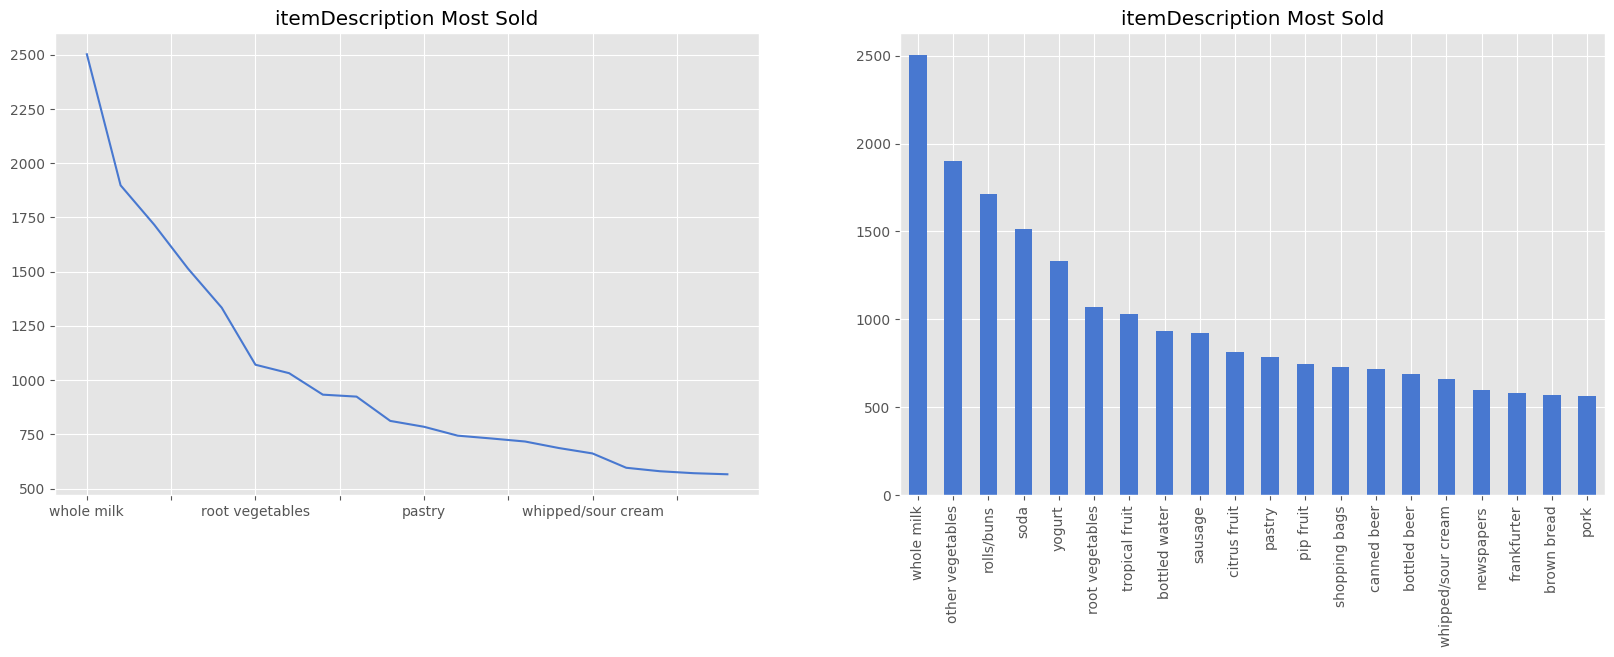

In [33]:
# visualisasikan data penjualan itemDescription terbanyak ke line chart dan bar chart
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
most_sold.plot(kind='line')
plt.title('itemDescription Most Sold')

plt.subplot(1,2,2)
most_sold.plot(kind='bar')
plt.title('itemDescription Most Sold')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


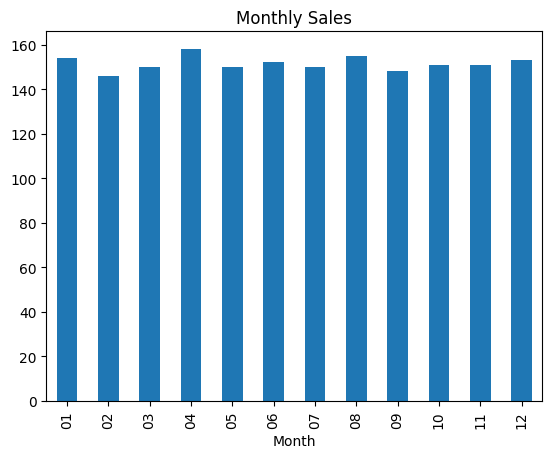

In [21]:
df.groupby('Month')['itemDescription'].nunique().plot(kind='bar', title='Monthly Sales')
plt.show()

Data penjualan perbulan cenderung sama dan tidak ada outlier<br>

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


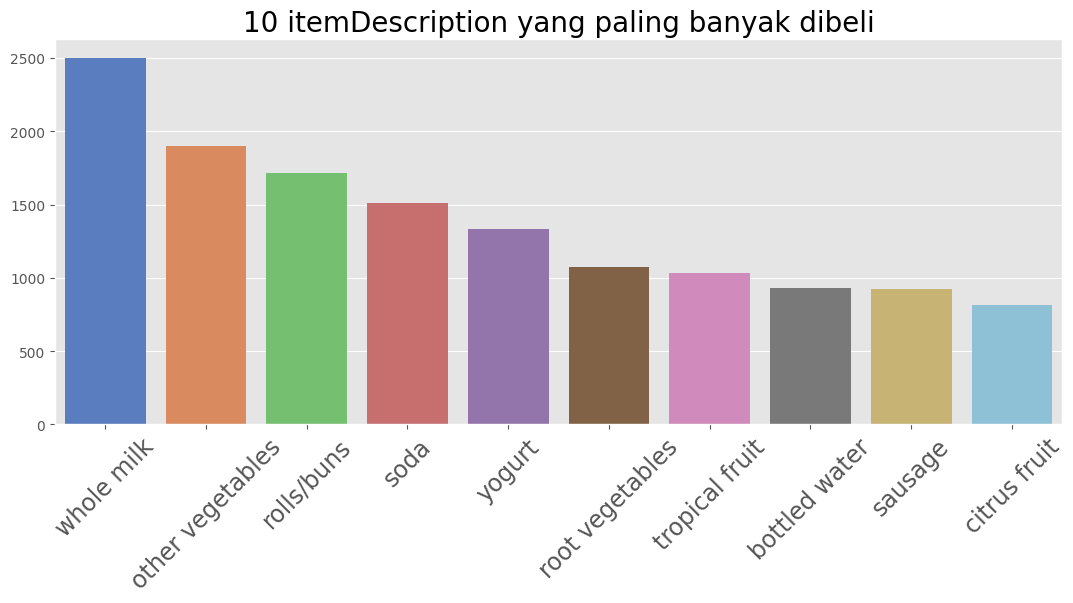

In [24]:
plt.figure(figsize=(13, 5))
sns.set_palette("muted")

sns.barplot(x=df["itemDescription"].value_counts()[:10].index,
            y=df["itemDescription"].value_counts()[:10].values)
plt.xlabel(""); plt.ylabel("")
plt.xticks(size=17, rotation=45)
plt.title('10 itemDescription yang paling banyak dibeli', size=20)
plt.show()

#Market Basket Analysis

Pertama kita mengubah item list menjadi data transaksi atau Member_number dengan menggunakan TransactionEncoder. Kita akan menggunakan frequent item-sets untuk menghasilkan aturan asosiasi dengan menggunakan algoritma Apriori.<br>

In [28]:
print(df.groupby('Month')['Day'].nunique())

Month
01    31
02    28
03    31
04    30
05    31
06    30
07    31
08    31
09    30
10    31
11    30
12    30
Name: Day, dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [29]:
# NOTE : Disini saya lupa mengimpor 2 library ini jadi saya simpan di data market
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules, apriori

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


kita membuat list transaction_list() yang unik sehingga kita dapat mengubah data kita ke dalam format yang bena<br>

In [44]:
transaction_list = []
for i in df['Member_number'].unique():
    tlist = list(set(df[df['Member_number']==i]['itemDescription']))
    if len(tlist)>0:
        transaction_list.append(tlist)
print(len(transaction_list))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


3898


Saya menggunakan TransactionEncoder untuk merubah bentuk transaction_list()<br>

In [31]:
te = TransactionEncoder()
te_ary = te.fit(transaction_list).transform(transaction_list)
df2 = pd.DataFrame(te_ary, columns=te.columns_)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Sekarang kita terapkan Apriori. Kita akan menggunakan parameter min_threshold (nilai ambang batas yang ditentukan) dalam aturan asosiasi untuk metrik lift menjadi 1,0 karena jika kurang dari satu, maka kedua item tersebut kemungkinan tidak akan dibeli bersama. Kita akan mengurutkan nilai berdasarkan keyakinan untuk melihat kemungkinan suatu bahan makanan dibeli jika pendahulunya dibeli.<br>

In [32]:
frequent_itemsets = apriori(df2, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1.0)
metrix = pd.DataFrame(rules)
metrix[['antecedents','consequents', 'support', 'confidence', 'lift']].sort_values('lift', ascending=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,support,confidence,lift
15176,"(other vegetables, sausage, whole milk)","(rolls/buns, yogurt)",0.013597,0.270408,2.428689
15193,"(rolls/buns, yogurt)","(other vegetables, sausage, whole milk)",0.013597,0.122120,2.428689
15184,"(rolls/buns, other vegetables, yogurt)","(sausage, whole milk)",0.013597,0.259804,2.428575
15185,"(sausage, whole milk)","(rolls/buns, other vegetables, yogurt)",0.013597,0.127098,2.428575
12801,"(sausage, whole milk)","(curd, yogurt)",0.010005,0.093525,2.322046
...,...,...,...,...,...
7645,(soda),"(frozen vegetables, other vegetables)",0.014366,0.045827,1.003549
984,(cream cheese ),(pip fruit),0.015136,0.171014,1.002428
985,(pip fruit),(cream cheese ),0.015136,0.088722,1.002428
477,(whipped/sour cream),(brown bread),0.021036,0.135987,1.000144


**KESIMPULAN**<br>
Berdasarkan analisa hasil yang telah dilakukan, didapatkan kesimpulan sebagai berikut:<br>

1.Semakin tinggi nilai suatu lift yang didapatkan menggunakan metode market basket analysis oleh algoritma apriori, maka semakin kuat hubungan antar item barang yang dijual. Data dengan jelas menunjukkan bahwa whole milk adalah bahan makanan yang paling banyak terjual.<br>

2.Adanya hubungan pada item Antecedent (IF) yang dibeli pelanggan, maka kemungkinan item Consequent (THEN) diambil oleh pelanggan dengan ID pelanggan yang sama juga.<br>

3.Bisnis selalu mencari cara untuk mengoptimalkan pengaturan dan meningkatkan penjualan. Oleh karena sekarang sudah mengetahui pola hubungan antara barang dan kepentingan bersama pelanggan, bisnis dapat membuat keputusan strategi pemasaran berdasarkan penelitian ini. Misalnya, toko groceries mungkin tertarik untuk mengadakan promosi barang gratis, mengingat kemungkinan besar item lain dijual sebagai hasilnya (misalkan, jika mereka mengadakan promo buy 1 get 1 khusus special event, itu mungkin tidak hanya menarik pelanggan baru yang sering datang, tetapi juga ada peluang yang sangat bagus bahwa pelanggan masih akan menghabiskan uang untuk whole milk).<br>